<a target="_blank" href="https://colab.research.google.com/github/Ganymede-Bio/bio-curve-fit/blob/main/examples/five_pl_logistic/five_pl_fit.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
! pip install bio-curve-fit


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot as plt
from bio_curve_fit.logistic import FourPLLogistic, FivePLLogistic
from bio_curve_fit.plotting import plot_standard_curve 

# Fitting a Five-Parameter Logistic Model to Create a Standard Curve using `bio-curve-fit`

For the purposes of demonstration, let's imagine we have 20 samples with a known concentration (standards) of an analyte. We've tested these standards, in triplicate, on an appropriate instrument and recorded the observed response signal. 

In [35]:
standard_curve_csv = """
known_concentration,instrument_response
0.01,0.002069117990872958
0.01,0.0020132494933515024
0.01,0.0021169840704374815
0.01438449888287663,0.001959532926455008
0.01438449888287663,0.0019884553193551735
0.01438449888287663,0.0019444061051506441
0.0206913808111479,0.0019060618132396786
0.0206913808111479,0.001948195812428334
0.0206913808111479,0.0018817446798727263
0.029763514416313176,0.0020199075226226327
0.029763514416313176,0.00208893443732371
0.029763514416313176,0.0020935290065508014
0.04281332398719394,0.00232136833694934
0.04281332398719394,0.0023468274954318875
0.04281332398719394,0.0023670255256337098
0.06158482110660264,0.002350039420066734
0.06158482110660264,0.0024226848713439883
0.06158482110660264,0.002328199275919817
0.08858667904100823,0.0034268951061987517
0.08858667904100823,0.0033724552342330205
0.08858667904100823,0.003333991357245253
0.12742749857031335,0.005976982077588455
0.12742749857031335,0.005894796802448098
0.12742749857031335,0.006183810672175324
0.18329807108324356,0.01429016019812947
0.18329807108324356,0.014007072131872945
0.18329807108324356,0.01451425437925086
0.26366508987303583,0.03919501065794866
0.26366508987303583,0.03816319608099027
0.26366508987303583,0.04029788595266494
0.37926901907322497,0.11012486126580442
0.37926901907322497,0.10773997727674114
0.37926901907322497,0.11289584492731791
0.5455594781168517,0.28788349523919826
0.5455594781168517,0.2874878807698649
0.5455594781168517,0.2806375306078681
0.7847599703514611,0.6293705171187065
0.7847599703514611,0.6292218560816774
0.7847599703514611,0.6107084160933515
1.1288378916846884,1.0942268483928872
1.1288378916846884,1.0779629449846204
1.1288378916846884,1.1151270114916647
1.623776739188721,1.5682314346793895
1.623776739188721,1.544967383412808
1.623776739188721,1.540068595980988
2.3357214690901213,1.9810187452329917
2.3357214690901213,1.9494269607495571
2.3357214690901213,1.9408931920431431
3.359818286283781,2.3179681138726
3.359818286283781,2.395117528971509
3.359818286283781,2.2504633190845866
4.832930238571752,2.5871131435953965
4.832930238571752,2.6507642395678666
4.832930238571752,2.6777030295287907
6.951927961775605,2.8003648496549087
6.951927961775605,2.8517696956036693
6.951927961775605,2.8775895443122463
10.0,2.968849253649377
10.0,3.032484862793274
10.0,2.896894467504049
"""

df = pd.read_csv(io.StringIO(standard_curve_csv))
df

,known_concentration,instrument_response
0,0.010000,0.002069
1,0.010000,0.002013
2,0.010000,0.002117
3,0.014384,0.001960
4,0.014384,0.001988
5,0.014384,0.001944
6,0.020691,0.001906
7,0.020691,0.001948
8,0.020691,0.001882
9,0.029764,0.002020


<Axes: xlabel='known_concentration', ylabel='instrument_response'>

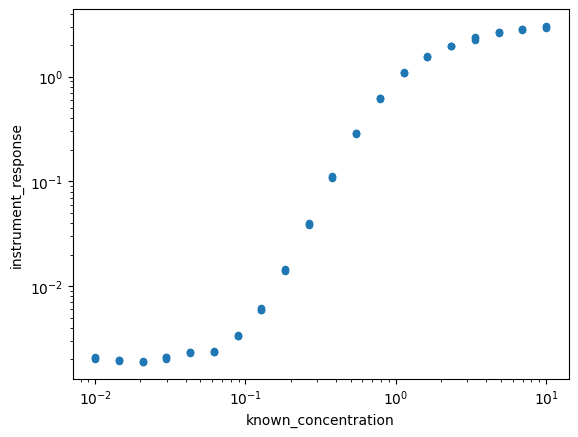

In [36]:
df.plot.scatter(x="known_concentration", y="instrument_response", logx=True, logy=True)

Next we'd like to fit a standard curve to these data to estimate the concentration of an unknown sample given its observed response signal. Per the plot, we clearly need a non-linear model to fit the data.

To do this, we'll use the `bio-curve-fit` package to fit a four-parameter and five-parameter logistic model to the data. Both models are used to fit dose-response data and are defined as:

$$f(x) = \frac{A-D}{1+\left(\frac{x}{C}\right)^B}+D$$

                                                
and

$$f(x) = D + \frac{A - D}{\left(1 + \left(\frac{x}{C}\right)^B\right)^S}$$

respectively.

`bio-curve-fit` will find the values for the parameters $A$, $B$, $C$, $D$, and $S$ that best fit the example data above.

In [37]:
# instantiate a 4PL model object
four_pl_model = FourPLLogistic()

x = df["known_concentration"]
y = df["instrument_response"]


# fit the model using the data
four_pl_model.fit(x, y, weight_func=lambda x:x)
four_pl_model

FourPLLogistic(A=0.001949464936626857, B=2.845595637975574,
               C=1.1722476686290517, D=2.5040078221095095)

In [38]:
# instantiate a 5PL model object
five_pl_model = FivePLLogistic()

x = df["known_concentration"]
y = df["instrument_response"]


# fit the model using the data
five_pl_model.fit(x, y, weight_func=lambda x:x)
five_pl_model

/Users/nickflores_ganymede/dev/bio-curve-fit/bio_curve_fit/logistic.py:540: RuntimeWarning: invalid value encountered in power
  z = (np.sign(x / C) * np.abs(x / C)) ** B


FivePLLogistic(A=0.002006901257671911, B=3.087036820144977,
               C=0.6903113152785875, D=3.68945557111049, S=0.20269883209762796)

Note that when we performed the fit, we provided a weight function based on the magnitude of observed values. This weight scheme ensures our model is not biased towards high signal values--this is especially important because our data spans several orders of magnitude. You can provide your own preferred weight function during fitting.


Both models have been fit to the data, and the best-fit parameters are visible above. The parameters can also be accessed individually:

In [39]:
five_pl_model.A_

0.002006901257671911

Since `bio-curve-fit` conforms with the scikit-learn API, we can easily check the $R^2$ using the `score()` method:

In [40]:
five_pl_model.score(x, y)

0.9994288917465566

The model fit also calculates upper and lower limits of detection:

In [41]:
print("Lower Limit of Detection: ", five_pl_model.LLOD_)
print("Upper Limit of Detection: ", five_pl_model.ULOD_)

Lower Limit of Detection:  0.04194258485186726
Upper Limit of Detection:  10.000000000000005


The default methodology is to use a value 2.5 standard deviations above the fitted curve as the lower limit of detection (where "standard deviation" is the standard deviation of the the lowest concentration standard replicates). The upper limit of detection is calculated as the highest concentration standard.

> Note: You can create your own methodology for calculating the LODs by passing a custom LOD function function into the `fit()` method. See [the code](../../bio_curve_fit/logistic.py) for more details.

Finally, let's plot the data and the fitted models:

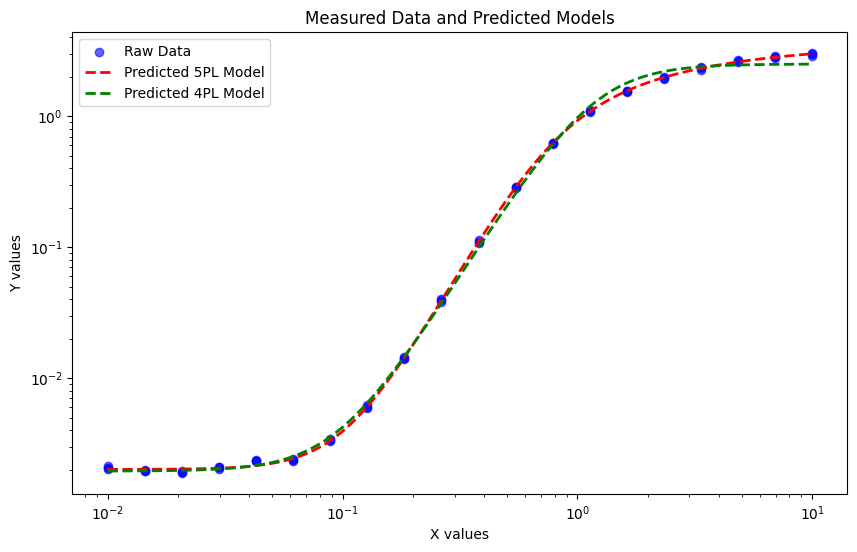

In [42]:

def generate_log_spaced_values(start, stop, num_points = 100):

    # Calculate the logarithmic range
    log_start = np.log10(start)
    log_stop = np.log10(stop)

    return np.logspace(log_start, log_stop, num_points)

smoothed_x_values = generate_log_spaced_values(min(df["known_concentration"]), max(df["known_concentration"]), 100)

four_PL_data = four_pl_model.predict(smoothed_x_values)
five_PL_data = five_pl_model.predict(smoothed_x_values)

plt.figure(figsize=(10, 6))
plt.scatter(df["known_concentration"], df["instrument_response"], color='blue', alpha=0.6, label='Raw Data')

# Plot the true model curve
plt.plot(smoothed_x_values, five_PL_data, color='red', linestyle='--', linewidth=2, label='Predicted 5PL Model')
plt.plot(smoothed_x_values, four_PL_data, color='green', linestyle='--', linewidth=2, label='Predicted 4PL Model')

# Labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.xscale("log")
plt.yscale("log")
plt.title(f'Measured Data and Predicted Models')
plt.legend()
plt.show()


While somewhat subtle, close observation reveals superior performance of the 5PL model for higher concentration samples. You should expect to see similar performance when your data has high levels of asymmetry.

With our model succesfully fit, we can now predict concentrations of new data.



In [45]:
newly_measured_responses = [0.005, 0.0124, 2.14, 1.10, 0.872]
five_pl_model.predict_inverse(newly_measured_responses)

array([0.11554827, 0.17327293, 2.74689818, 1.1411622 , 0.96045729])

Note that we use the `predict_inverse()` function because we are predicting the concentration of the unknown samples from the measured signal. I.e. given the plots above, we've measured new values of $y$ (instrument response) and want to predict the corresponding values of $x$ (analyte concentration).